In [1]:
# Importing modules that will be used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adding Data
## Reading in data from local csv using pandas read_csv function
comparison_df = pd.read_csv('County_Comparison.csv')
comparison_df.head()

# Identify the types of each column
print(comparison_df.dtypes)

NAME                         object
SLUG                         object
LIFE-EXPECTANCY-AT-BIRTH    float64
DATE-OF-INFORMATION         float64
INTERNET-USERS              float64
REGION                       object
dtype: object


In [3]:
# Manipulating Data
# using the drop function to get rid of unnecessary columns
clean_comparison_df = comparison_df.drop(columns=['SLUG', 'DATE-OF-INFORMATION'])
clean_comparison_df.head()

,NAME,LIFE-EXPECTANCY-AT-BIRTH,INTERNET-USERS,REGION
0,Afghanistan,53.65,7007101.0,South Asia
1,Albania,79.47,2043251.0,Europe
2,Algeria,78.03,27626157.0,Africa
3,American Samoa,75.32,17147.0,Australia and Oceania
4,Andorra,83.42,71084.0,Europe


In [4]:
ranked_comparison_df = clean_comparison_df.copy()
ranked_comparison_df['Life_Expectancy_Rank'] = ranked_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'].rank(ascending=False)

# sorting dataframe by life expectancy rank in descending order
sorted_comparison_df = ranked_comparison_df.sort_values(by='Life_Expectancy_Rank')
sorted_comparison_df.head()

,NAME,LIFE-EXPECTANCY-AT-BIRTH,INTERNET-USERS,REGION,Life_Expectancy_Rank
135,Monaco,89.52,37798.0,Europe,1.0
183,Singapore,86.35,5230942.0,East and Southeast Asia,2.0
122,Macau,84.98,571421.0,East and Southeast Asia,3.0
102,Japan,84.83,1621552.0,East and Southeast Asia,4.0
176,San Marino,83.86,20318.0,Europe,5.0


In [5]:
median_expectancy = str(sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'].median())
print ("The median life expectancy for all countries is " + median_expectancy + " years.")

The median life expectancy for all countries is 75.8 years.


In [6]:
result = sorted_comparison_df.groupby('REGION').agg({'LIFE-EXPECTANCY-AT-BIRTH': ['median']})
print ('Here are the median life expectancies of all countires in each region:')
print (result)

Here are the median life expectancies of all countires in each region:
                                  LIFE-EXPECTANCY-AT-BIRTH
                                                    median
REGION                                                    
Africa                                              65.850
Australia and Oceania                               75.950
Central America and the Caribbean                   77.905
Central Asia                                        72.395
East and Southeast Asia                             75.825
Europe                                              81.510
Middle East                                         76.515
North America                                       81.000
South America                                       75.405
South Asia                                          72.355


Data Visualizations

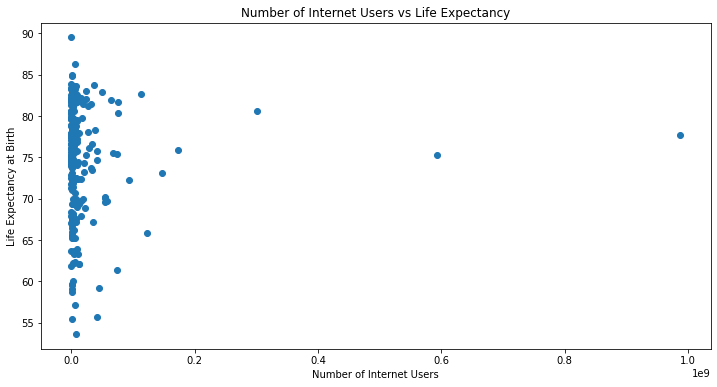

In [14]:
#set variables 
num_users=sorted_comparison_df['INTERNET-USERS']
l_expenctancy=sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH']

# scatterplot with the generic plot function
plt.figure(figsize = (12,6))
plt.plot(num_users, l_expenctancy,'o' )
plt.title ('Number of Internet Users vs Life Expectancy')
plt.xlabel ('Number of Internet Users')
plt.ylabel ('Life Expectancy at Birth')
plt.show()

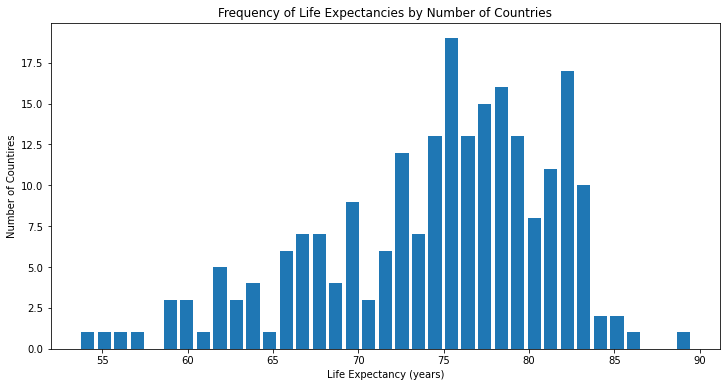

In [21]:
#Histogram
plt.figure(figsize=(12,6))
plt.hist(sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'], bins = 37, rwidth=0.8)
plt.title('Frequency of Life Expectancies by Number of Countries')
plt.xlabel("Life Expectancy (years)")
plt.ylabel("Number of Countires")
plt.show()

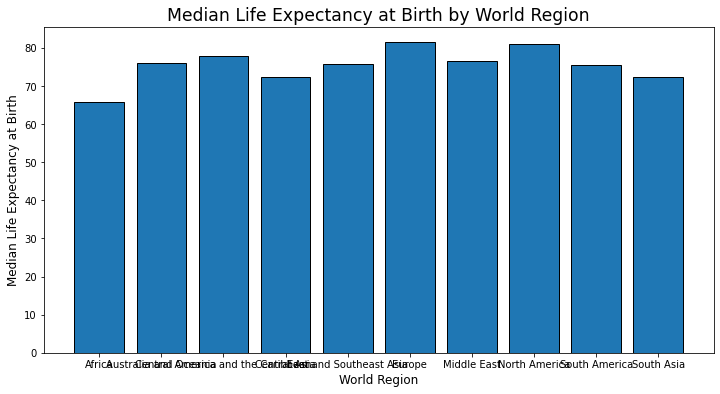

In [36]:
comparsion_by_region = sorted_comparison_df.groupby(['REGION'], as_index=False).median()

plt.figure(figsize=(12,6))
plt.bar(comparsion_by_region['REGION'], comparsion_by_region['LIFE-EXPECTANCY-AT-BIRTH'], edgecolor='black')
plt.title("Median Life Expectancy at Birth by World Region", fontsize='xx-large')
plt.xlabel('World Region', fontsize='large')
plt.ylabel('Median Life Expectancy at Birth', fontsize='large')
plt.show()


In [46]:
# Creating helper objects
regional_le = np.array(comparsion_by_region['LIFE-EXPECTANCY-AT-BIRTH'])
regional_regions = np.array(comparsion_by_region['REGION'])

regional_le = np.round(regional_le,1)
regional_le = regional_le.astype(int)


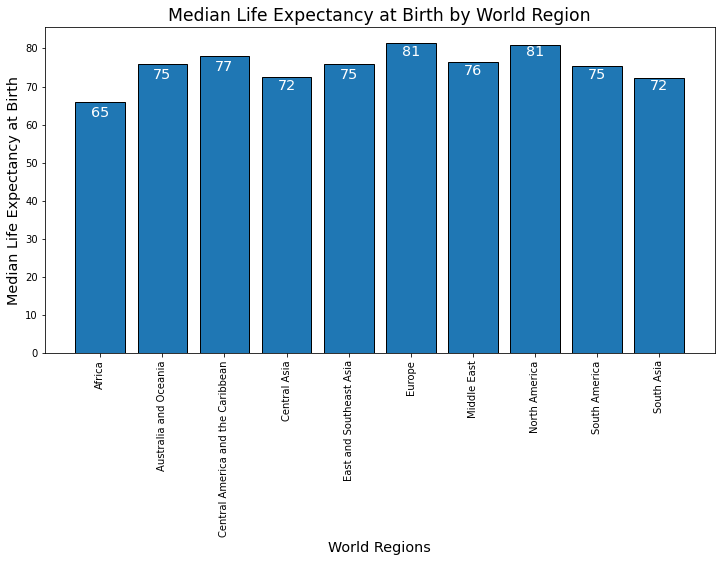

In [69]:
plt.figure(figsize=(12,6))
plt.bar(comparsion_by_region['REGION'], comparsion_by_region['LIFE-EXPECTANCY-AT-BIRTH'], edgecolor='black')
plt.title("Median Life Expectancy at Birth by World Region", fontsize='xx-large')
plt.xlabel('World Regions', fontsize='x-large')
plt.ylabel('Median Life Expectancy at Birth', fontsize='x-large')
plt.xticks(rotation='vertical')

for i in range(len(regional_le)):
        plt.annotate(text = (str(regional_le[i])), xy = (regional_regions[i], regional_le[i]),
            fontsize= 'x-large', horizontalalignment='center', verticalalignment='top', color='white')

plt.show()